# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [2]:
#Read/Importing data
df= pd.read_csv(r'bank_data.csv',delimiter=';')

In [3]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [4]:
#Keeping copy of file for future 
df1= df.copy()

In [5]:
## Data Cleaning and Preprocessing

In [6]:
#To display top 5 rows of the table
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#To display number of rows and columns
df.shape

(41188, 21)

In [8]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#To display data types of columns
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
#To display list of columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
#To display number of missing values and treat them
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64

In [13]:
#To display number of duplicate values
df.duplicated().sum()

12

In [14]:
# Droping duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [16]:
#To display values and its count for categorical columns
for i in cat_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature job
Unique Values - 12
Value Counts
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Feature marital
Unique Values - 4
Value Counts
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
----------------------------------------
Feature education
Unique Values - 8
Value Counts
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
----------------------------------------
Feature default
Unique Values - 3
Value Counts
no         32577
unknown    

In [17]:
df['education'] = df['education'].replace(['basic.9y','basic.6y','basic.4y'],'basic')
df['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [18]:
df['y'] = df['y'].replace({'yes':1, 'no':0})
df['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [19]:
## EDA - Exploratory Data Analysis

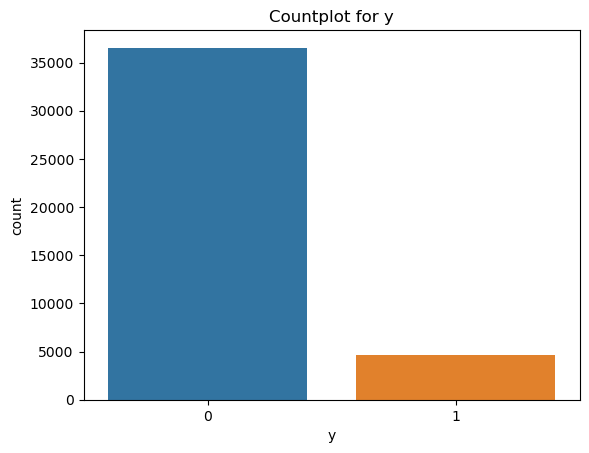

In [20]:
#To display countplot of target variable
sns.countplot(x=df['y'])
plt.title('Countplot for y')
plt.show()

In [21]:
#To display basic statistical values for numeric columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [22]:
# Univariate analysis

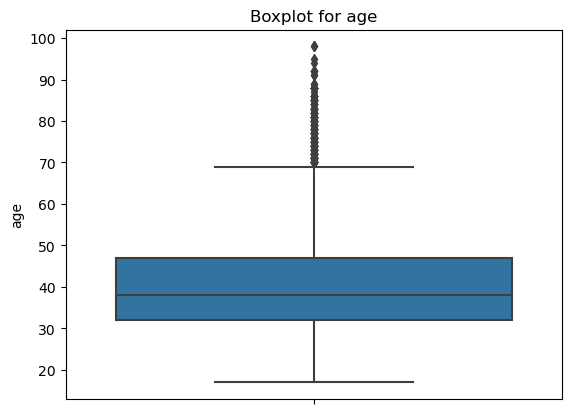

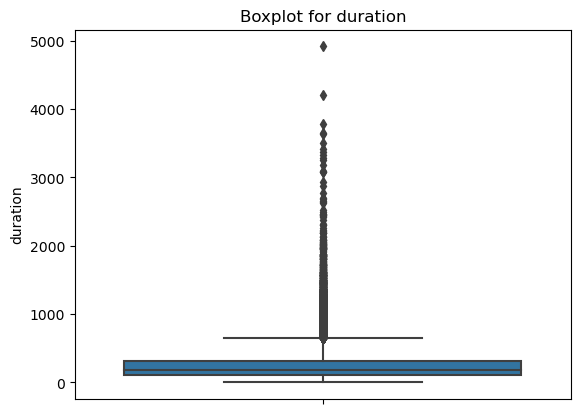

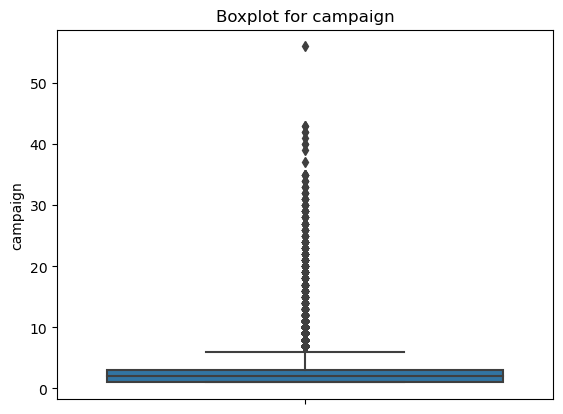

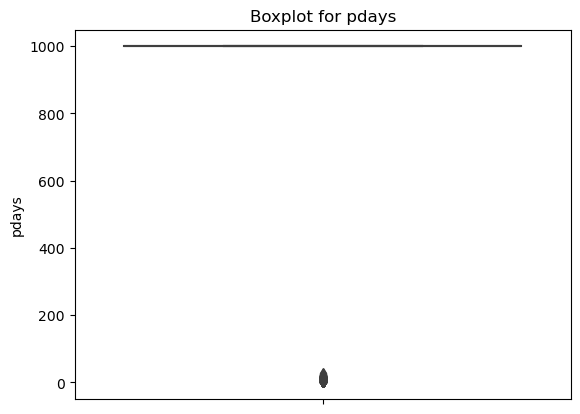

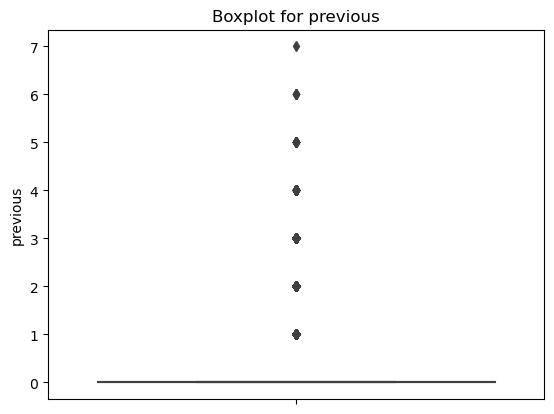

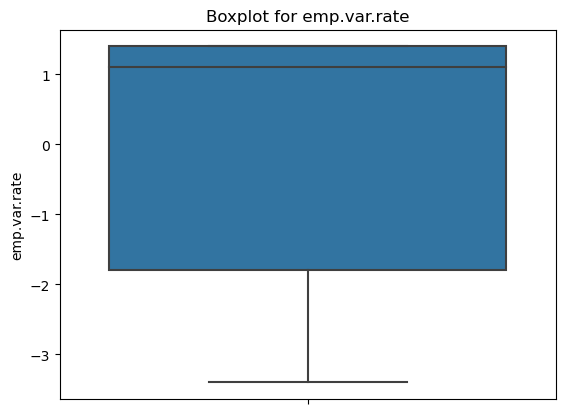

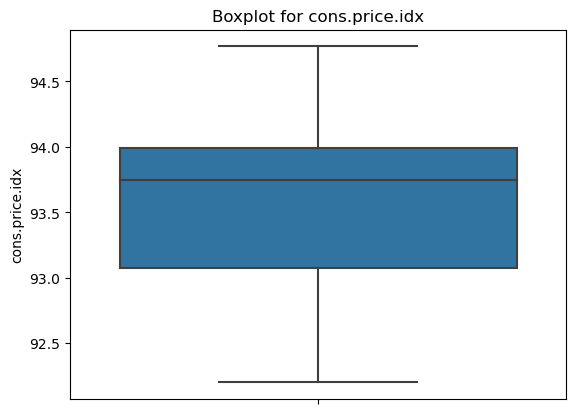

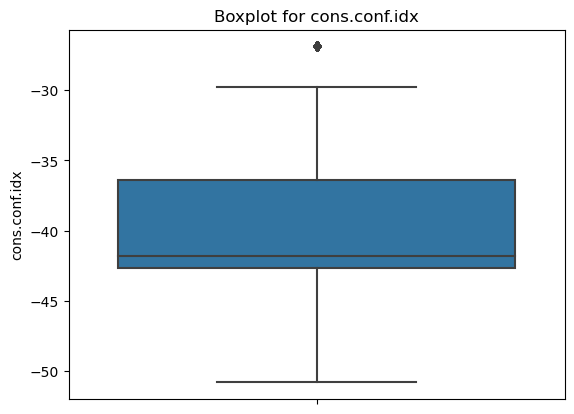

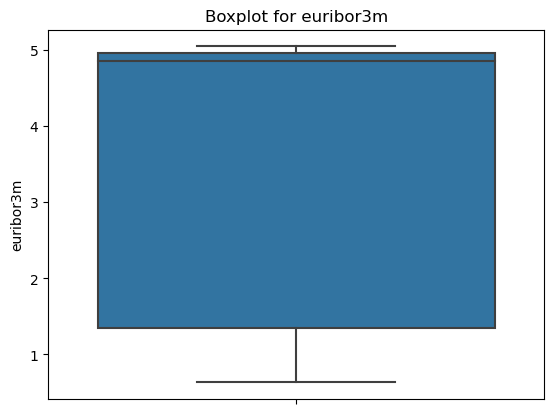

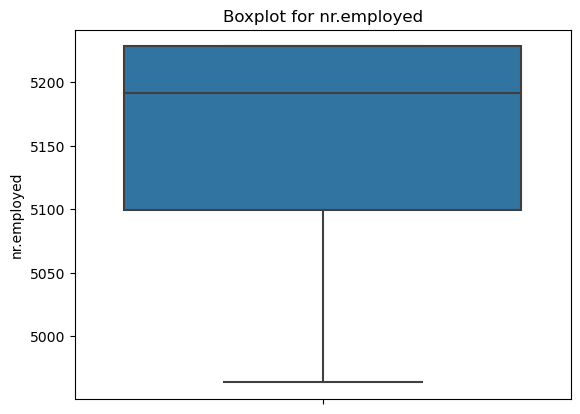

In [23]:
#To display box plot for all numeric columns
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

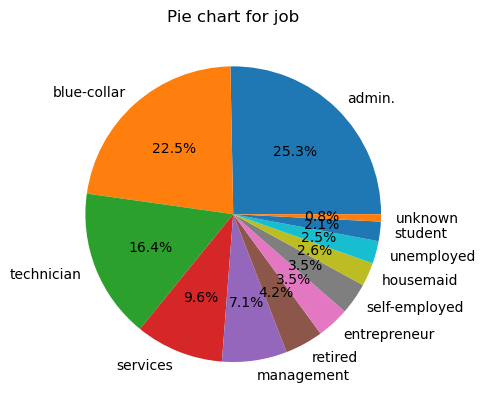

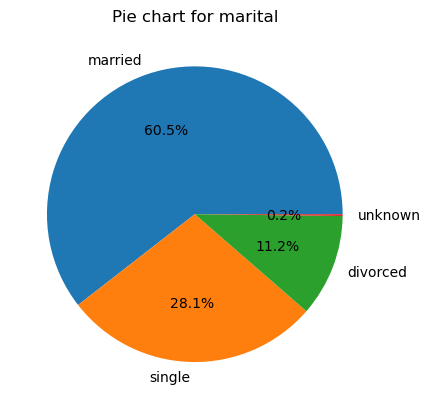

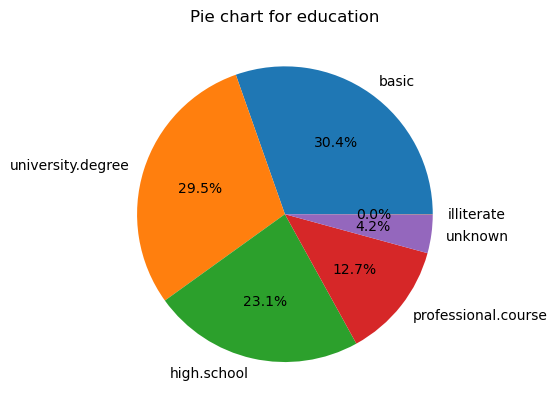

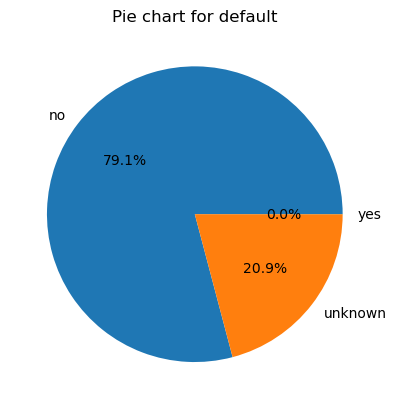

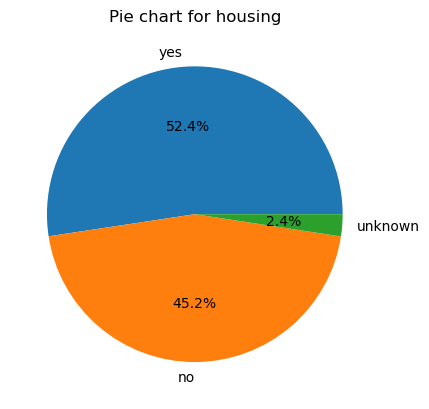

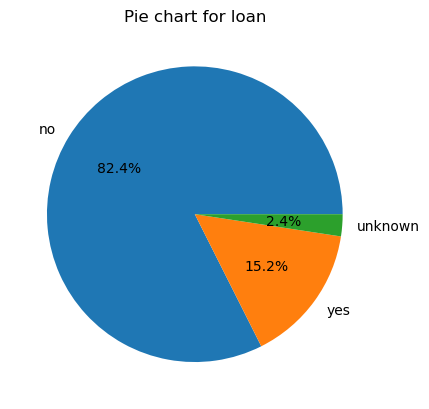

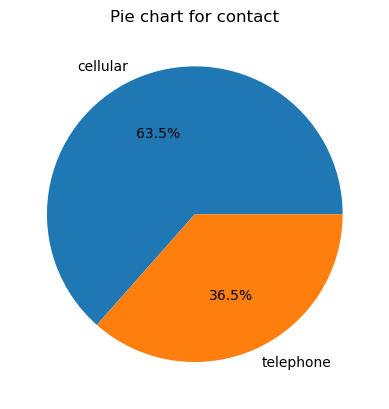

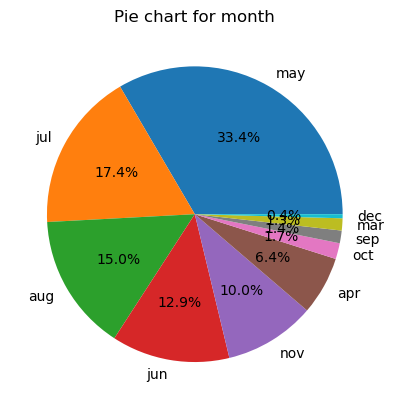

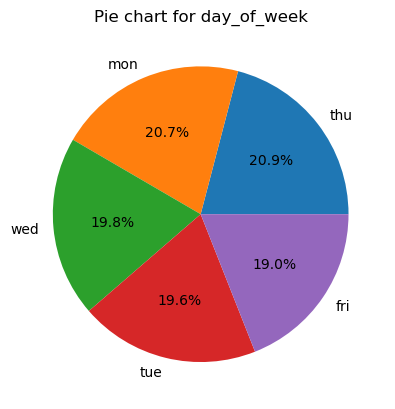

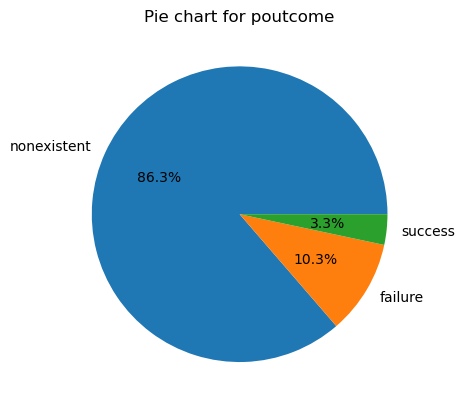

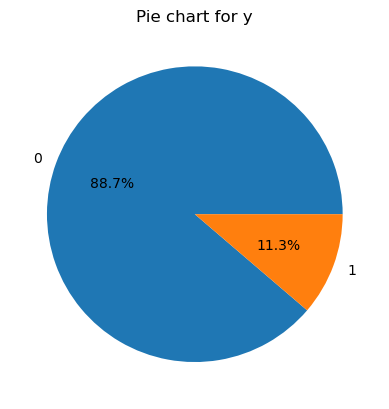

In [24]:
#To display pie chart for all categorical columns
for i in cat_cols:
    count = df[i].value_counts()
    labels = count.index.tolist()
    sizes = count.values.tolist()
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Pie chart for {i}')
    plt.show()

In [25]:
# Bi-Variate Analysis

In [26]:
# To display pair plot between two numeric columns
# sns.pairplot(df,vars=num_cols)  
# plt.show()

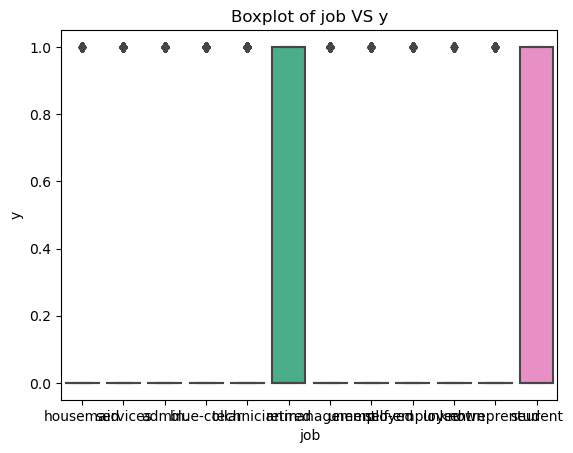

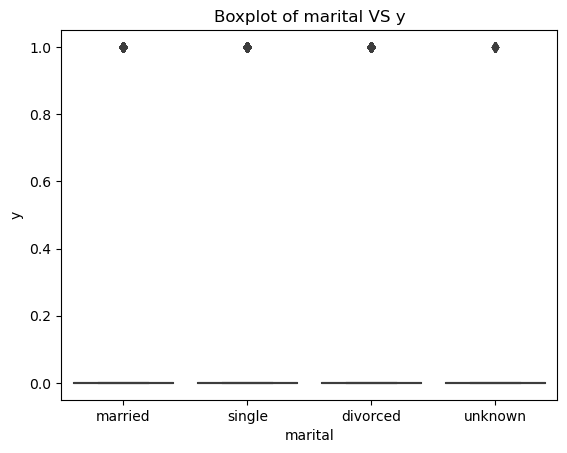

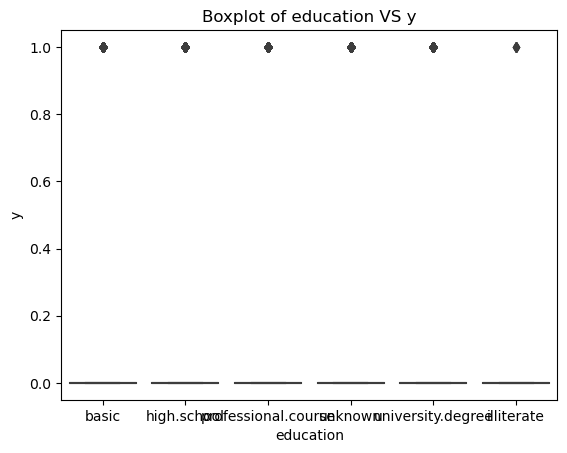

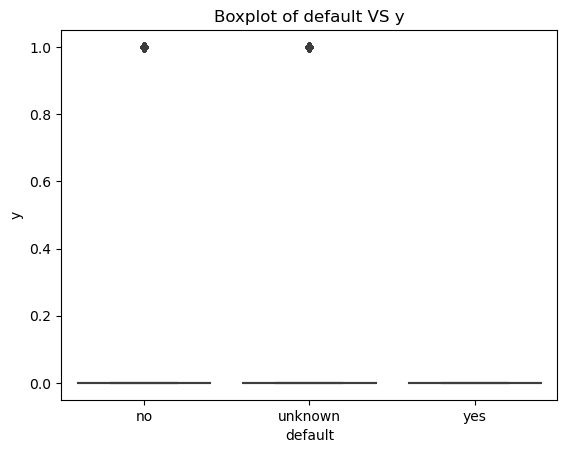

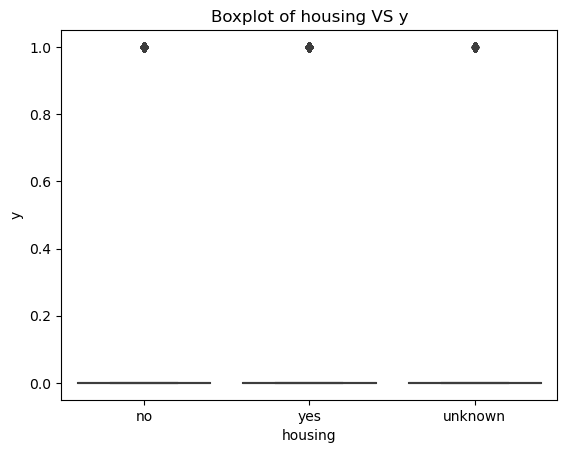

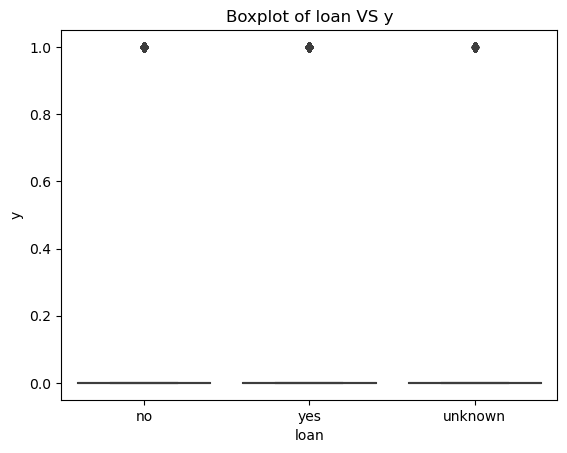

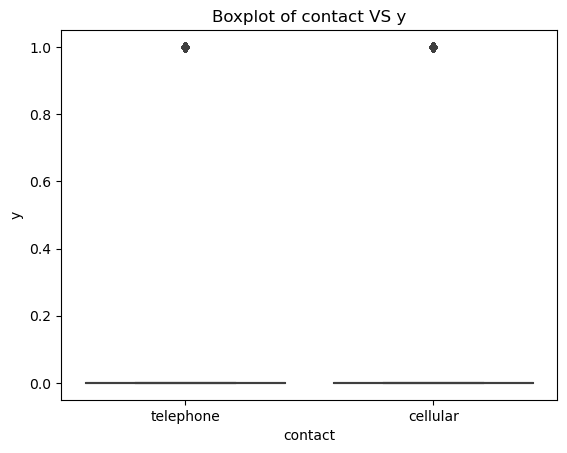

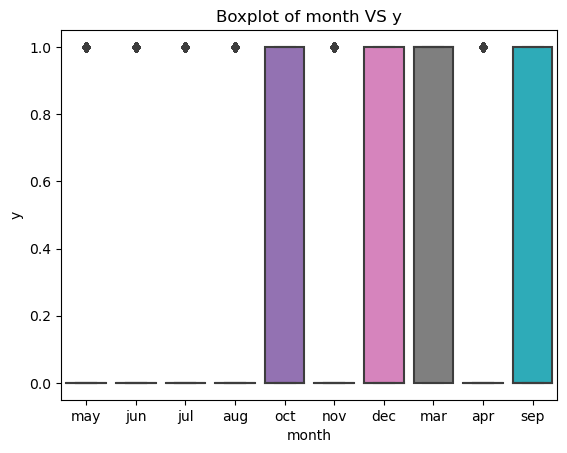

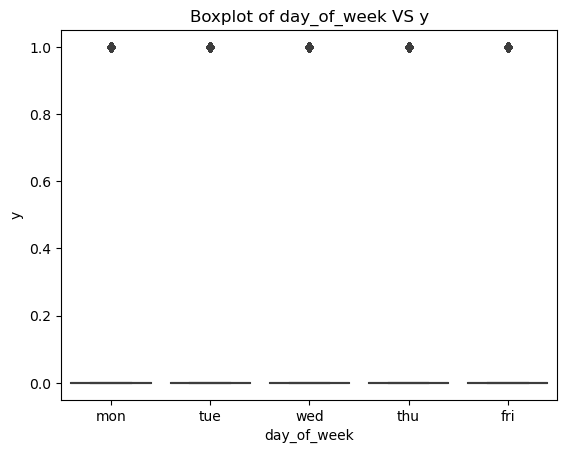

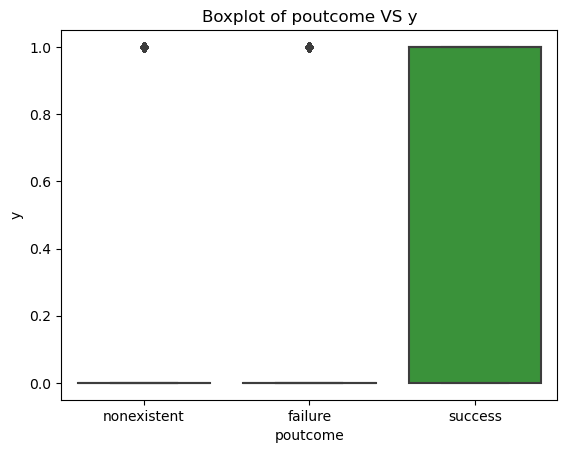

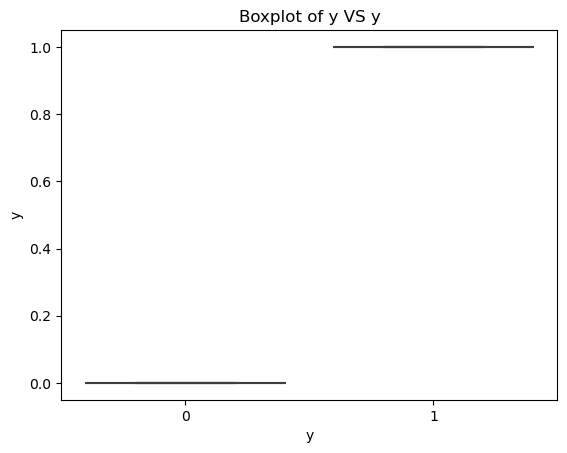

In [27]:
#To display box plot between numeric and categorical columns
for i in cat_cols:
    sns.boxplot(x=df[i],y=df['y'])
    plt.title(f'Boxplot of {i} VS y')
    plt.show()

In [28]:
#Multi-variate Analysis

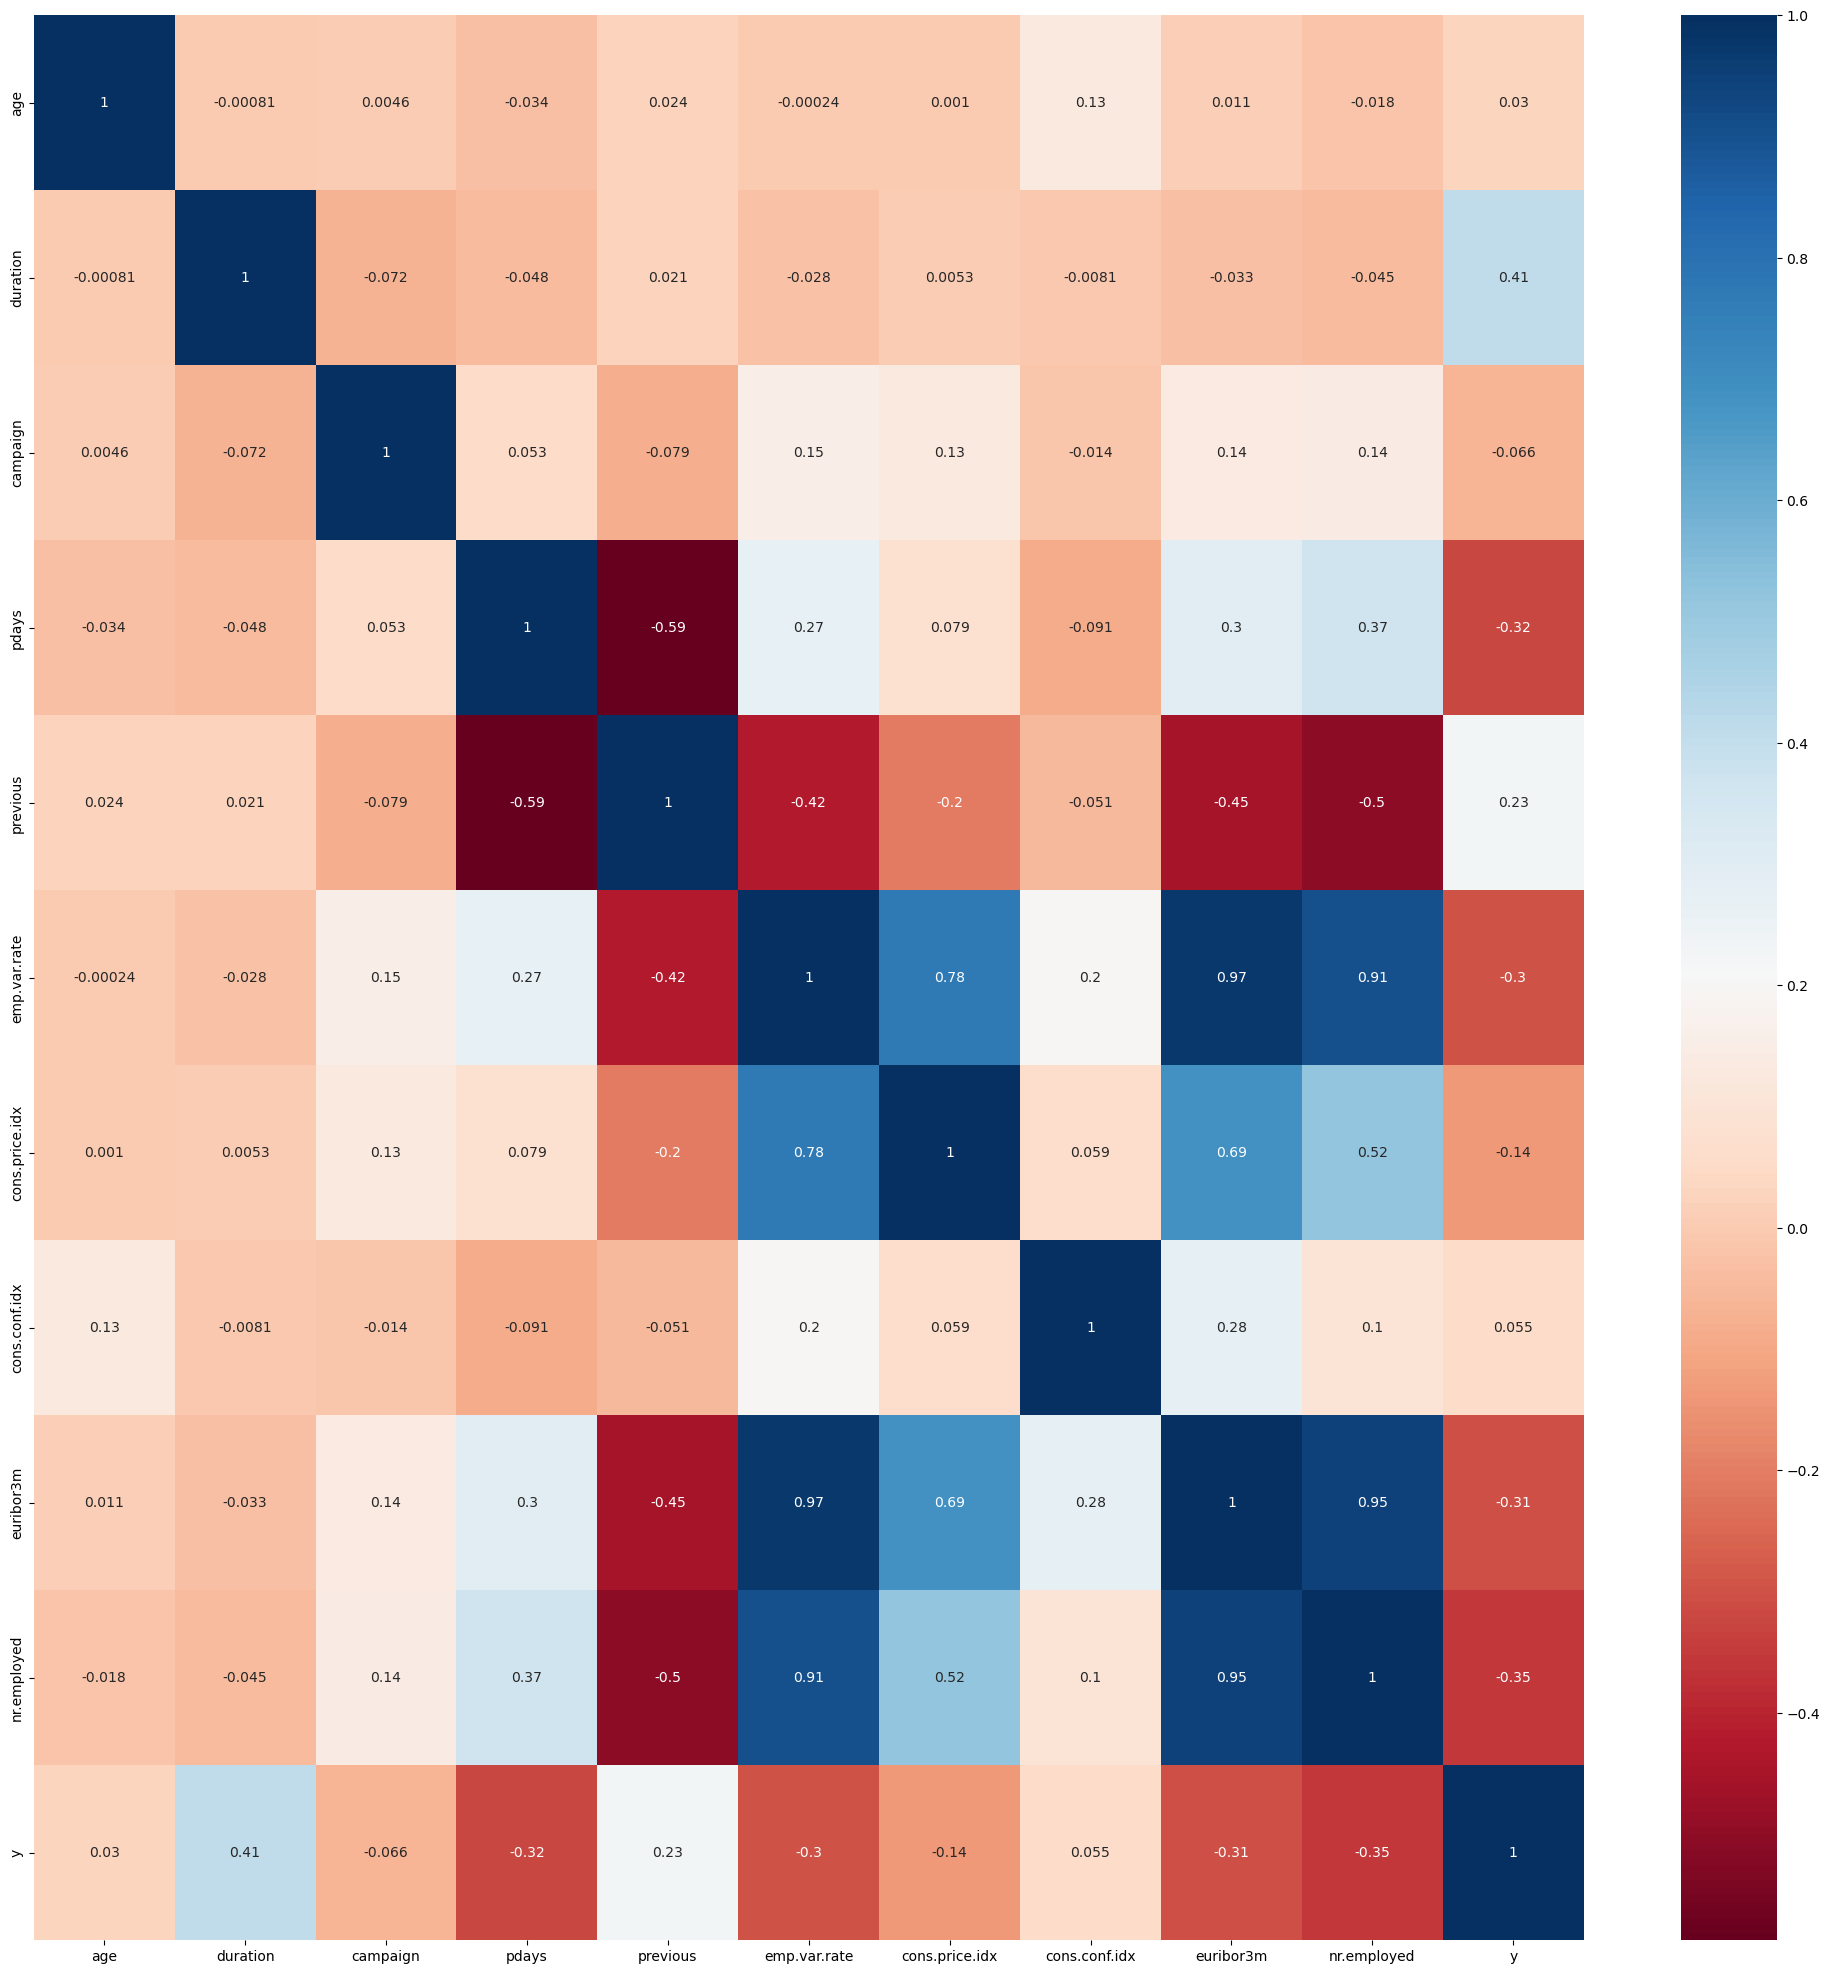

In [29]:
#To display correlation between different columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

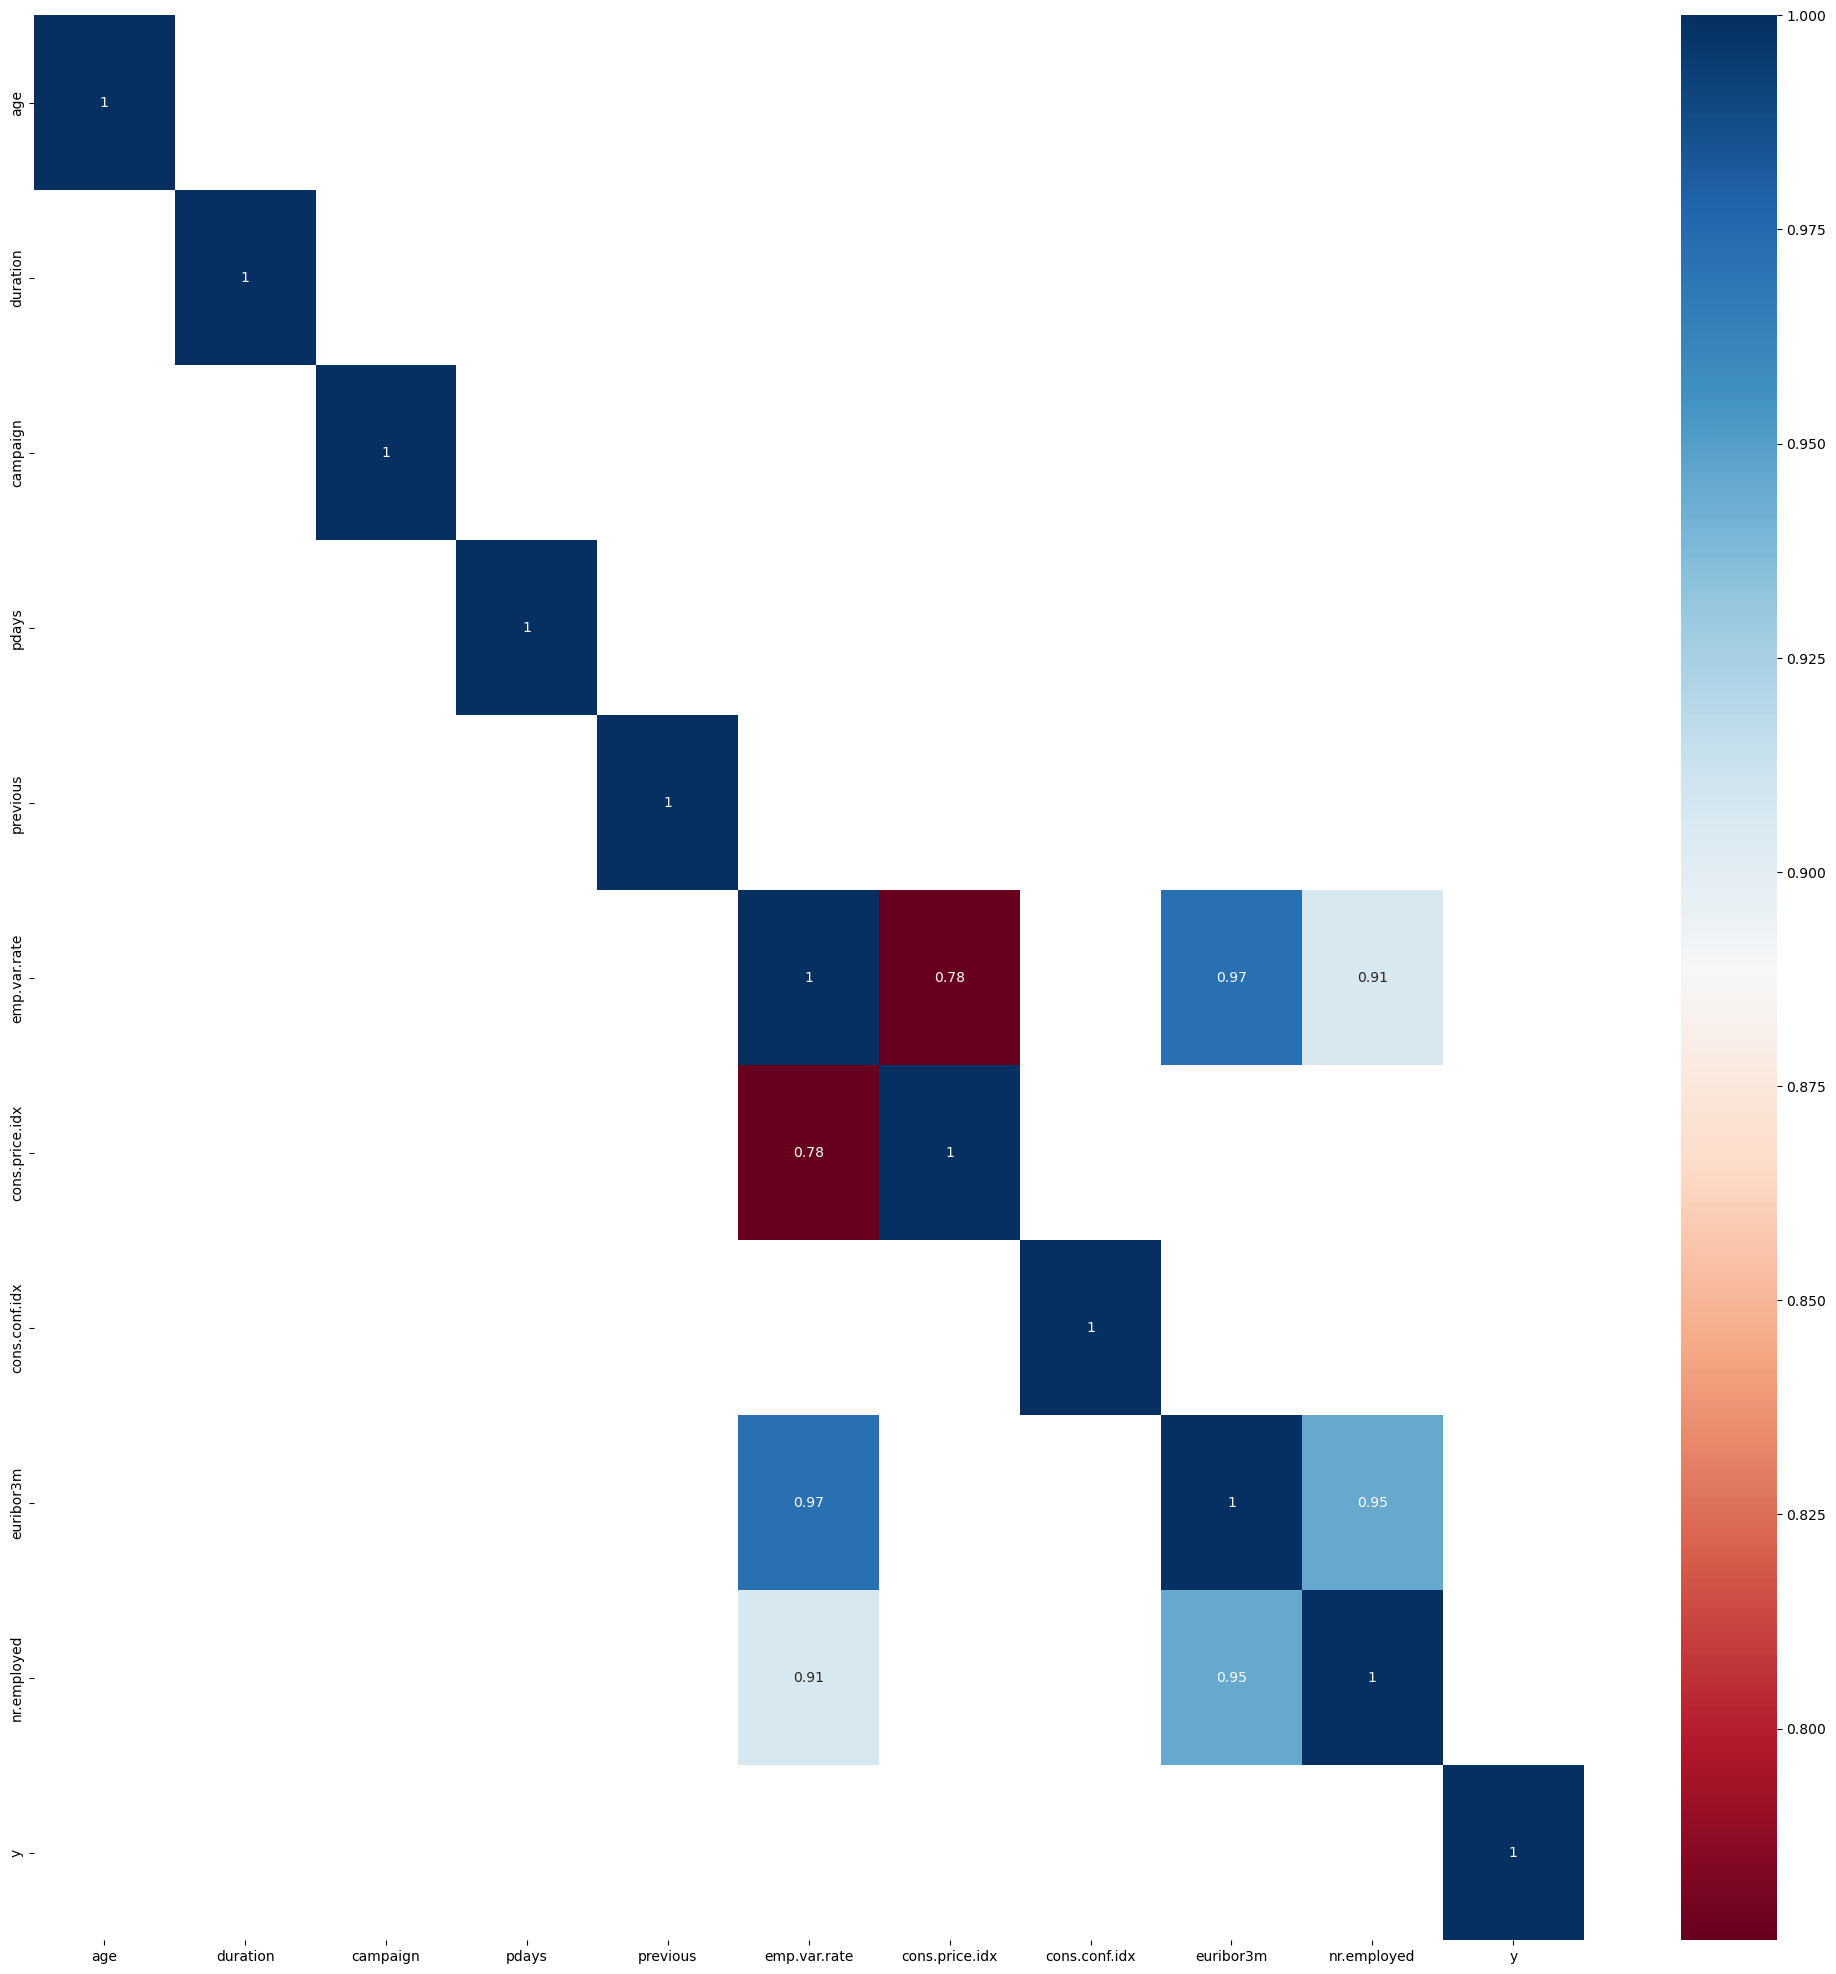

In [30]:
#To display columns that have high correlation
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.7], annot=True, cmap='RdBu')
plt.show()

In [31]:
# Outlier Treatment

In [32]:
df.describe(percentiles=[0.01,0.03,0.05,0.10,0.90,0.95,0.97,0.99]).T

,count,mean,std,min,1%,3%,5%,10%,50%,90%,95%,97%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,25.000,26.000,28.000,38.000,55.000,58.000,59.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,23.000,36.000,59.000,180.000,551.000,753.000,911.000,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,1.000,1.000,1.000,2.000,5.000,7.000,9.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,9.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.000,-2.900,-1.800,1.100,1.400,1.400,1.400,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,92.431,92.713,92.893,93.749,94.465,94.465,94.465,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-46.200,-41.800,-36.100,-33.600,-31.400,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.720,0.797,1.046,4.857,4.964,4.966,4.967,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,5017.500,5076.200,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


In [33]:
def out_treat(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [34]:
out_cols = ['age','duration','campaign','previous']
df[out_cols] = df[out_cols].apply(lambda x :  out_treat(x))

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [37]:
#### Label Encoding

from sklearn.preprocessing import LabelEncoder

In [38]:
lb = LabelEncoder()

cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [39]:
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [40]:
df.dtypes

age               float64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [41]:
# Model building

In [42]:
# Creating Function to evalute the model performance

In [43]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, precision, recall, acc, kappa, f1

    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')

    print('Accuracy_Score is', round(acc,4))
    print('precision Score is:', round(precision,4))
    print('Recall Score is:', round(recall,4))
    print('kappa Score is:', round(kappa,4))
    print('F1 Score is:', round(f1,4))

    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    plt.show()

In [44]:
def plot_roc_auc(model,y_test,ypred_proba):
    global auc
    fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1])
    auc = roc_auc_score(y_test,ypred_proba[:,1])
    print('AUC:',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

In [45]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'AUC Score' , 'Precision Score', 
                                   'Recall Score', 'Accuracy Score', 
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score, 
                                    'Test Score': test_score,
                                     'AUC Score' : auc,
                                    'Precision Score': precision, 
                                    'Recall Score': recall, 'Accuracy Score': acc, 
                                    'Kappa Score': kappa, 'f1-score': f1}, ignore_index = True)
    return(score_card)

In [46]:
#Select the Dependent and Independent Features
x = df.drop('y',axis=1)
y = df['y']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(41176, 20) (41176,)


In [47]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28823, 20)
(12353, 20)
(28823,)
(12353,)


In [48]:
# Logistic Regression


Training Score is: 91.14 %
Testing Score is: 90.99000000000001 %

Accuracy_Score is 0.9099
precision Score is: 0.6569
Recall Score is: 0.4304
kappa Score is: 0.4727
F1 Score is: 0.5201

Confusion Matrix is
 [[10637   315]
 [  798   603]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10952
           1       0.66      0.43      0.52      1401

    accuracy                           0.91     12353
   macro avg       0.79      0.70      0.74     12353
weighted avg       0.90      0.91      0.90     12353



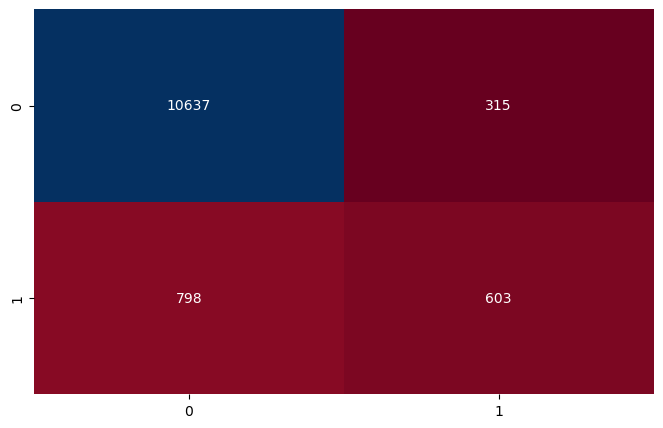

In [49]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

In [50]:
### ROC_AUC Curve

AUC: 0.927493614338918


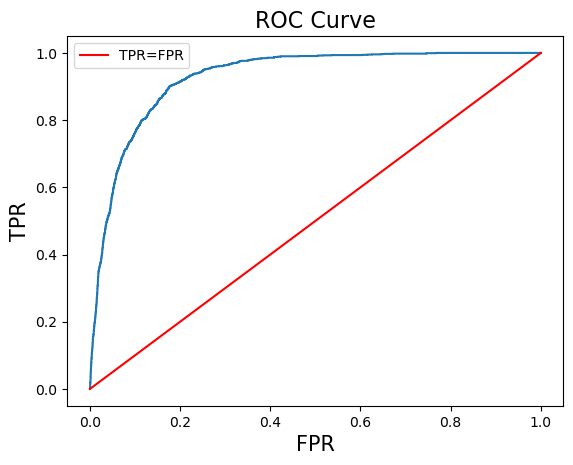

In [51]:
ypred_proba_lr = lr.predict_proba(x_test)
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_proba_lr)

In [52]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

1278
0.09674897969020077


In [53]:
#### Creating tabulated data for evaluation matrix

In [54]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.9099,0.927494,0.656863,0.430407,0.9099,0.472705,0.520052


In [55]:
#### Logistic Regression (using SGD)


Training Score is: 89.84 %
Testing Score is: 89.14999999999999 %

Accuracy_Score is 0.8915
precision Score is: 0.5199
Recall Score is: 0.5689
kappa Score is: 0.4819
F1 Score is: 0.5433

Confusion Matrix is
 [[10216   736]
 [  604   797]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10952
           1       0.52      0.57      0.54      1401

    accuracy                           0.89     12353
   macro avg       0.73      0.75      0.74     12353
weighted avg       0.90      0.89      0.89     12353



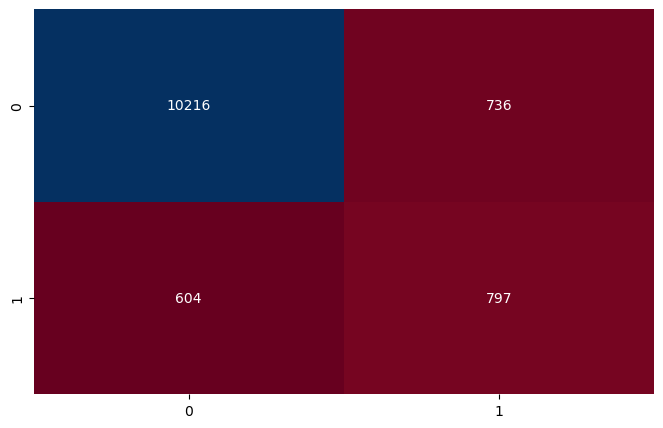

In [56]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

AUC: 0.927493614338918


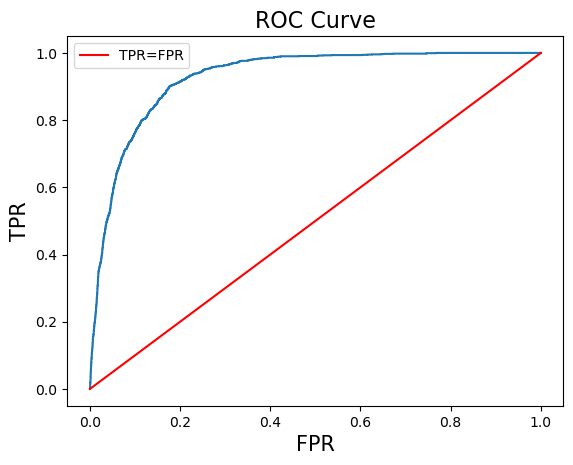

In [57]:
ypred_proba_lr_SGD = lr.predict_proba(x_test)
fpr_lr2,tpr_lr2,thresh_lr2 = plot_roc_auc(lr_SGD,y_test,ypred_proba_lr_SGD)

In [58]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286


In [59]:
# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 88.97 %

Accuracy_Score is 0.8897
precision Score is: 0.5132
Recall Score is: 0.5253
kappa Score is: 0.4569
F1 Score is: 0.5192

Confusion Matrix is
 [[10254   698]
 [  665   736]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10952
           1       0.51      0.53      0.52      1401

    accuracy                           0.89     12353
   macro avg       0.73      0.73      0.73     12353
weighted avg       0.89      0.89      0.89     12353



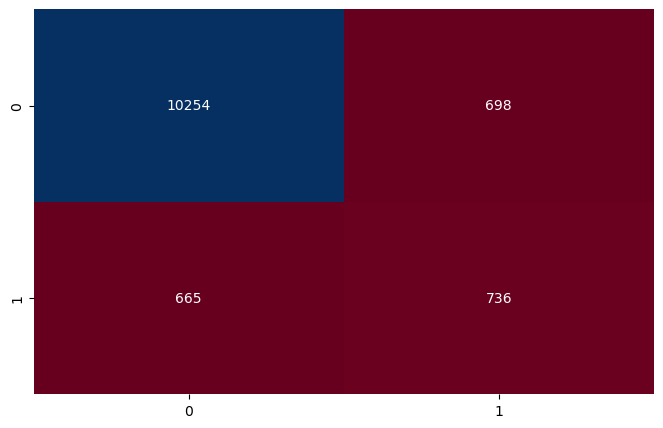

In [60]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

In [61]:
ypred_proba_dt1 = dt1.predict_proba(x_test)

AUC: 0.7308031959849195


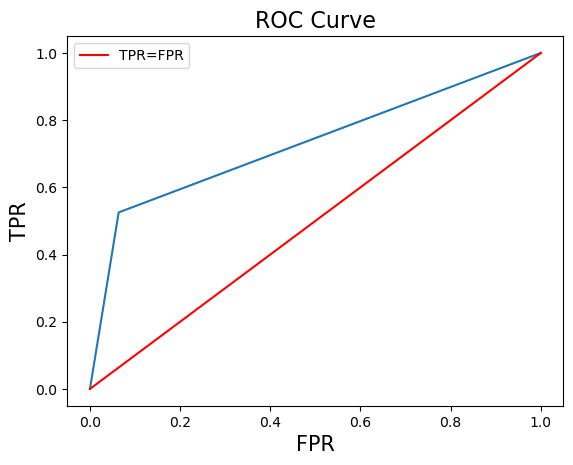

In [62]:
fpr_dt1,tpr_dt1,thresh_dt1 = plot_roc_auc(dt1,y_test,ypred_proba_dt1)

In [63]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224


In [64]:
# Decision Tree with Pruning

In [65]:
tuned_paramaters = [ {'criterion':['gini','entropy'],'max_depth':[8,9,10,11,12,14],
'min_samples_split':[8,10,12,14,15,16,20]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 20} 




Training Score is: 92.7 %
Testing Score is: 91.31 %

Accuracy_Score is 0.9131
precision Score is: 0.647
Recall Score is: 0.5153
kappa Score is: 0.526
F1 Score is: 0.5737

Confusion Matrix is
 [[10558   394]
 [  679   722]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10952
           1       0.65      0.52      0.57      1401

    accuracy                           0.91     12353
   macro avg       0.79      0.74      0.76     12353
weighted avg       0.91      0.91      0.91     12353



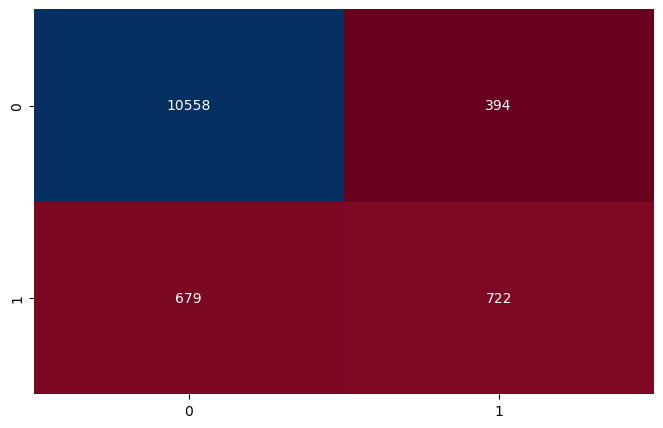

In [66]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=8, min_samples_split=20) # Enter values from best_params
eval_model(dt2,x_train,x_test,y_train,y_test)

In [67]:
ypred_proba_dt2 = dt2.predict_proba(x_test)

AUC: 0.9251371177010682


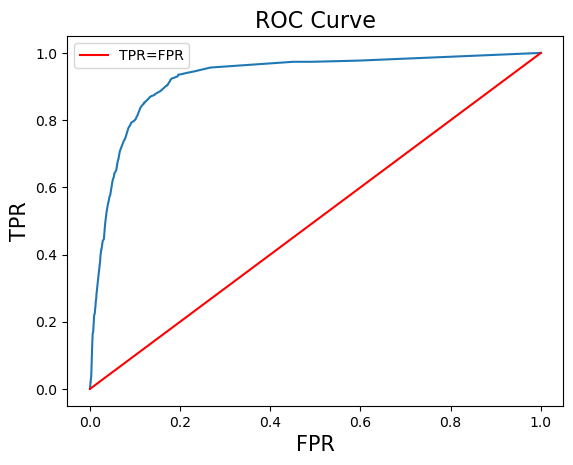

In [68]:
fpr_dt2,tpr_dt2,thresh_dt2 = plot_roc_auc(dt2,y_test,ypred_proba_dt2)

In [69]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699


In [70]:
# Ensemble Learning

In [71]:
# Bagging Classifier


Training Score is: 99.21 %
Testing Score is: 90.64 %

Accuracy_Score is 0.9064
precision Score is: 0.6127
Recall Score is: 0.4754
kappa Score is: 0.4843
F1 Score is: 0.5354

Confusion Matrix is
 [[10531   421]
 [  735   666]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10952
           1       0.61      0.48      0.54      1401

    accuracy                           0.91     12353
   macro avg       0.77      0.72      0.74     12353
weighted avg       0.90      0.91      0.90     12353



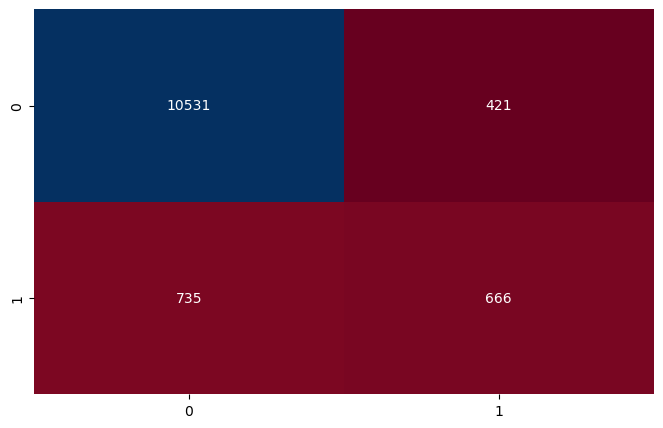

In [72]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

In [73]:
ypred_proba_bag = bag.predict_proba(x_test)

AUC: 0.9172599374650998


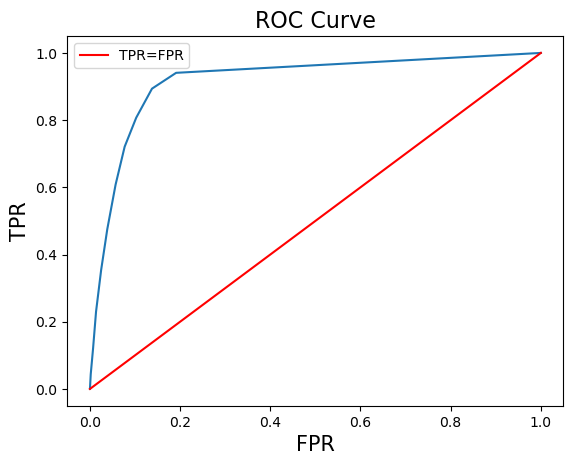

In [74]:
fpr_bag,tpr_bag,thresh_bag = plot_roc_auc(bag,y_test,ypred_proba_bag)

In [75]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370


In [76]:
# AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 88.96 %

Accuracy_Score is 0.8896
precision Score is: 0.5131
Recall Score is: 0.5189
kappa Score is: 0.4537
F1 Score is: 0.516

Confusion Matrix is
 [[10262   690]
 [  674   727]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10952
           1       0.51      0.52      0.52      1401

    accuracy                           0.89     12353
   macro avg       0.73      0.73      0.73     12353
weighted avg       0.89      0.89      0.89     12353



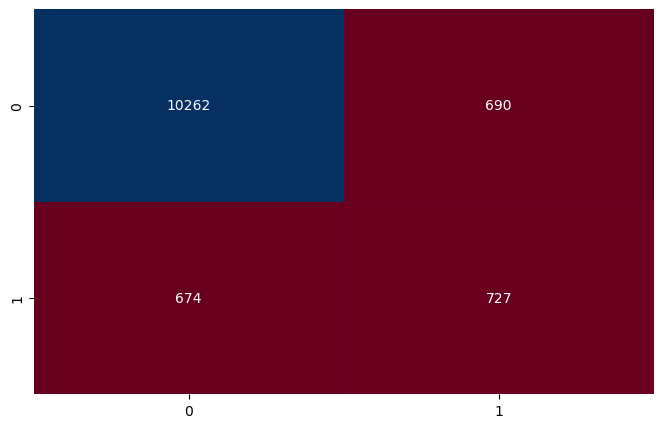

In [77]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

In [78]:
ypred_proba_adaboost = adaboost.predict_proba(x_test)

AUC: 0.7279564346451899


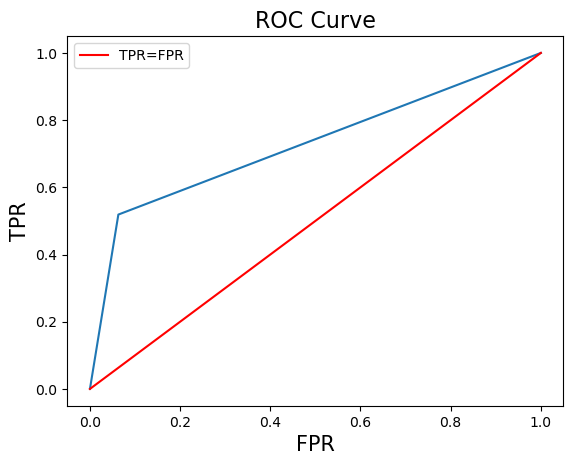

In [79]:
fpr_adaboost,tpr_adaboost,thresh_adaboost = plot_roc_auc(adaboost,y_test,ypred_proba_adaboost)

In [80]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969


In [81]:
# XGBoost Classifier


Training Score is: 92.36999999999999 %
Testing Score is: 91.55 %

Accuracy_Score is 0.9155
precision Score is: 0.6564
Recall Score is: 0.5346
kappa Score is: 0.5427
F1 Score is: 0.5893

Confusion Matrix is
 [[10560   392]
 [  652   749]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10952
           1       0.66      0.53      0.59      1401

    accuracy                           0.92     12353
   macro avg       0.80      0.75      0.77     12353
weighted avg       0.91      0.92      0.91     12353



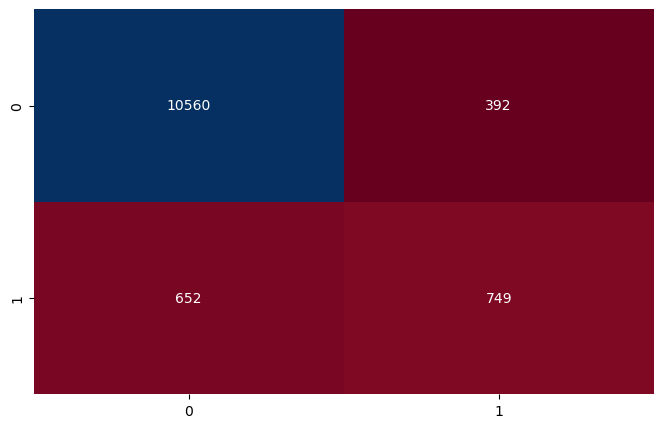

In [82]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

In [83]:
ypred_proba_xgbm = xgbm.predict_proba(x_test)

AUC: 0.9393502971111629


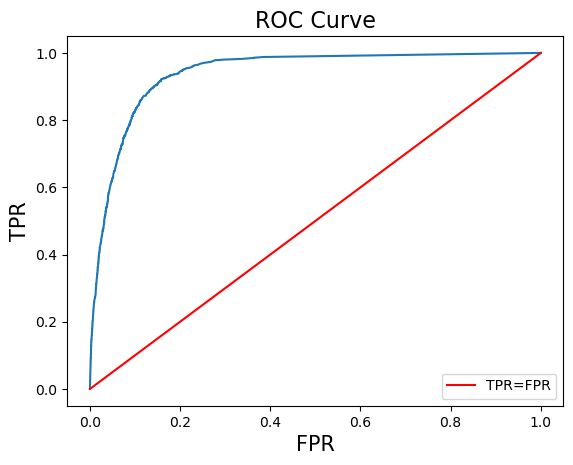

In [84]:
fpr_xgbm,tpr_xgbm,thresh_xgbm = plot_roc_auc(xgbm,y_test,ypred_proba_xgbm)

In [85]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300


In [86]:
# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 91.36 %

Accuracy_Score is 0.9136
precision Score is: 0.6513
Recall Score is: 0.5132
kappa Score is: 0.5267
F1 Score is: 0.5741

Confusion Matrix is
 [[10567   385]
 [  682   719]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10952
           1       0.65      0.51      0.57      1401

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.76     12353
weighted avg       0.91      0.91      0.91     12353



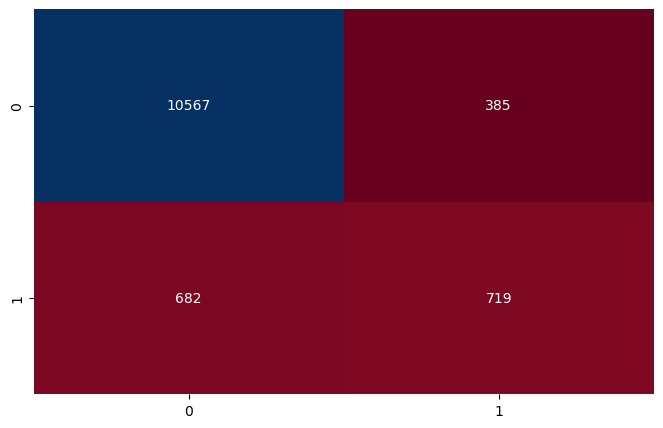

In [87]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

In [88]:
ypred_proba_rf = rf.predict_proba(x_test)

AUC: 0.940344643213733


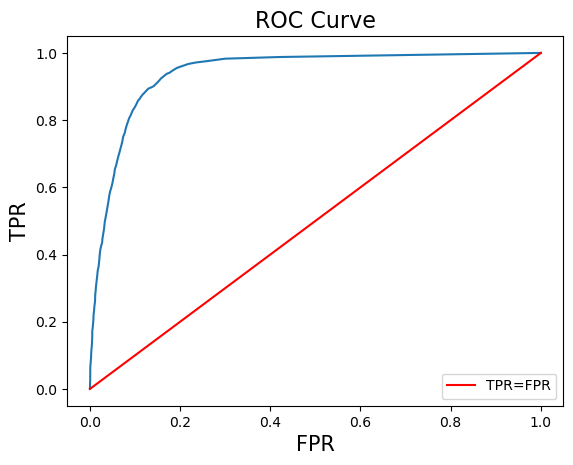

In [89]:
fpr_rf,tpr_rf,thresh_rf = plot_roc_auc(rf,y_test,ypred_proba_rf)

In [90]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052


In [91]:
# Random Forest with GridSearchCV

In [92]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20], 
                     'max_depth': [8, 10], 
                     'min_samples_leaf': [5,10], 
                     'max_leaf_nodes': [10, 15] }]

rf_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_CV, param_grid = tuned_paramaters, cv = 10)

rf_grid = grid.fit(x_train, y_train)

print('Best parameters for random forest Classifier: ', rf_grid.best_params_, '\n')

Best parameters for random forest Classifier:  {'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100} 




Training Score is: 90.34 %
Testing Score is: 90.0 %

Accuracy_Score is 0.9
precision Score is: 0.7293
Recall Score is: 0.1884
kappa Score is: 0.2653
F1 Score is: 0.2995

Confusion Matrix is
 [[10854    98]
 [ 1137   264]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10952
           1       0.73      0.19      0.30      1401

    accuracy                           0.90     12353
   macro avg       0.82      0.59      0.62     12353
weighted avg       0.89      0.90      0.87     12353



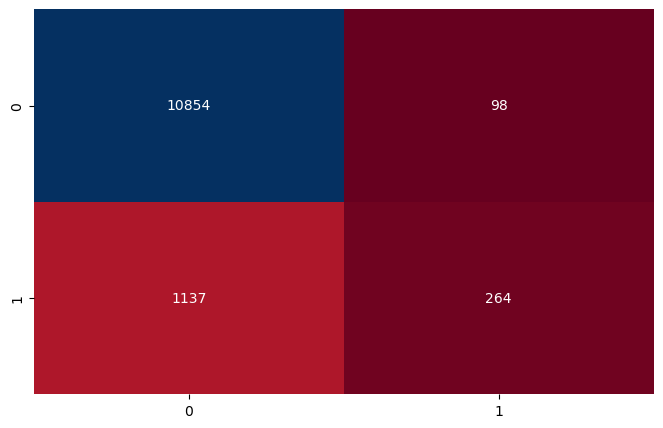

In [93]:
rf2 = RandomForestClassifier(max_depth=8, 
                            max_leaf_nodes=15, 
                            min_samples_leaf=5,
                            min_samples_split=20,
                            n_estimators=10)
eval_model(rf2,x_train,x_test,y_train,y_test)

In [94]:
ypred_proba_rf2 = rf2.predict_proba(x_test)

AUC: 0.9197325074075753


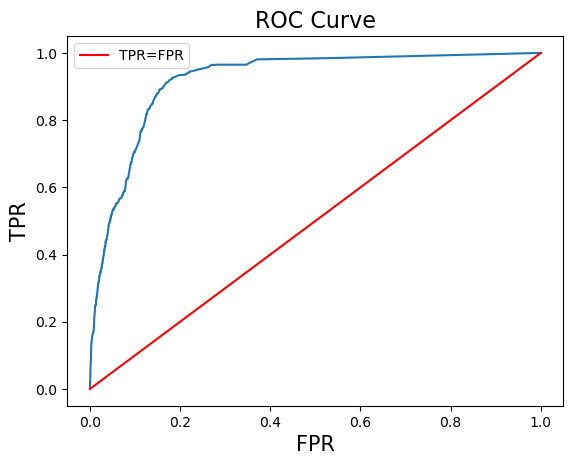

In [95]:
fpr_rf2,tpr_rf2,thresh_rf2 = plot_roc_auc(rf2,y_test,ypred_proba_rf2)


In [96]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490


In [97]:
# Naive Bayes Classifier


Training Score is: 84.63000000000001 %
Testing Score is: 84.66 %

Accuracy_Score is 0.8466
precision Score is: 0.3897
Recall Score is: 0.6231
kappa Score is: 0.3951
F1 Score is: 0.4795

Confusion Matrix is
 [[9585 1367]
 [ 528  873]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10952
           1       0.39      0.62      0.48      1401

    accuracy                           0.85     12353
   macro avg       0.67      0.75      0.69     12353
weighted avg       0.88      0.85      0.86     12353



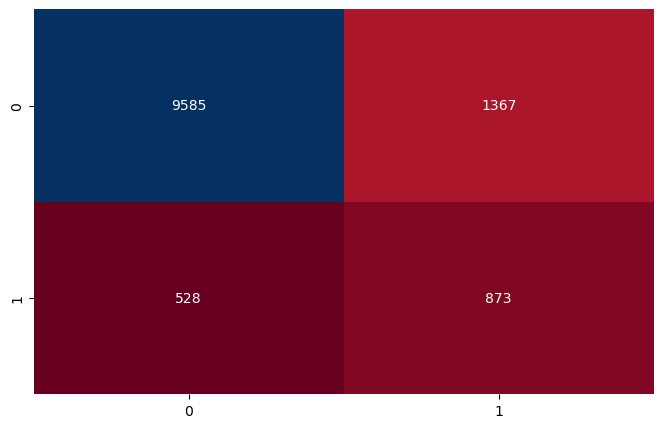

In [98]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

AUC: 0.8560777377006615


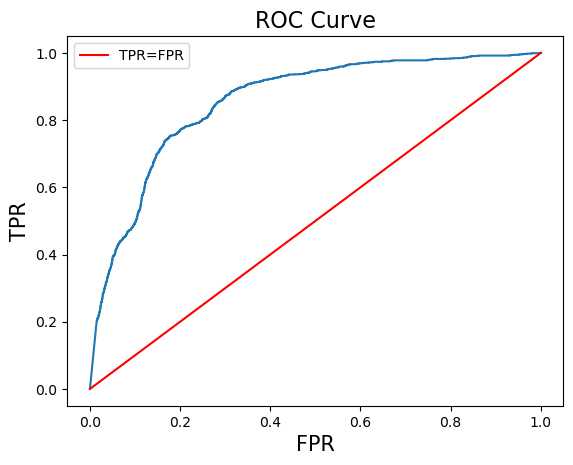

In [99]:
ypred_proba_gnb = gnb.predict_proba(x_test)

fpr_gnb,tpr_gnb,thresh_gnb = plot_roc_auc(gnb,y_test,ypred_proba_gnb)

In [100]:
update_score_card(model_name = 'Naive Bayes Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [101]:
# KNN Classifier


Training Score is: 92.43 %
Testing Score is: 90.75999999999999 %

Accuracy_Score is 0.9076
precision Score is: 0.6171
Recall Score is: 0.4889
kappa Score is: 0.495
F1 Score is: 0.5456

Confusion Matrix is
 [[10527   425]
 [  716   685]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10952
           1       0.62      0.49      0.55      1401

    accuracy                           0.91     12353
   macro avg       0.78      0.73      0.75     12353
weighted avg       0.90      0.91      0.90     12353



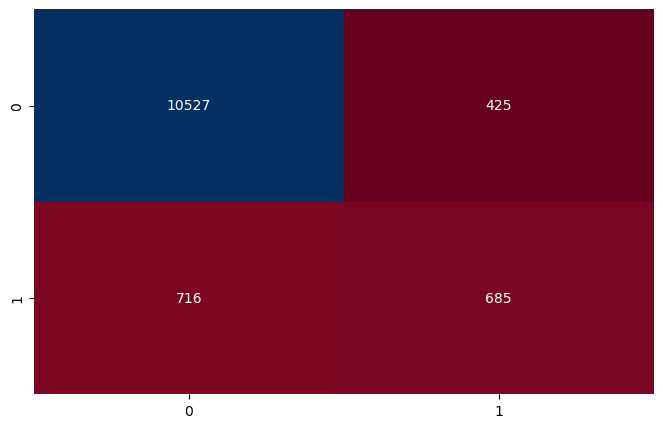

In [102]:
knn1 = KNeighborsClassifier(n_neighbors=9)
eval_model(knn1,x_train,x_test,y_train,y_test)

AUC: 0.899748998810721


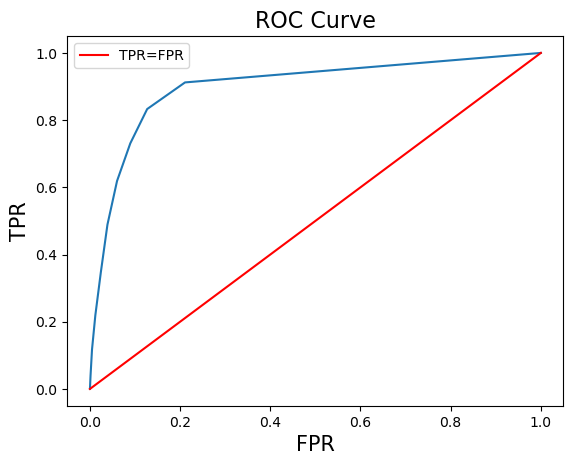

In [103]:
ypred_proba_knn1 = knn1.predict_proba(x_test)

fpr_knn1,tpr_knn1,thresh_knn1 = plot_roc_auc(knn1,y_test,ypred_proba_knn1)

In [104]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [105]:
# To find optimal number of neighbors for KNN

In [106]:
neighbors = list(range(3,51,2))
knn_acc = []
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

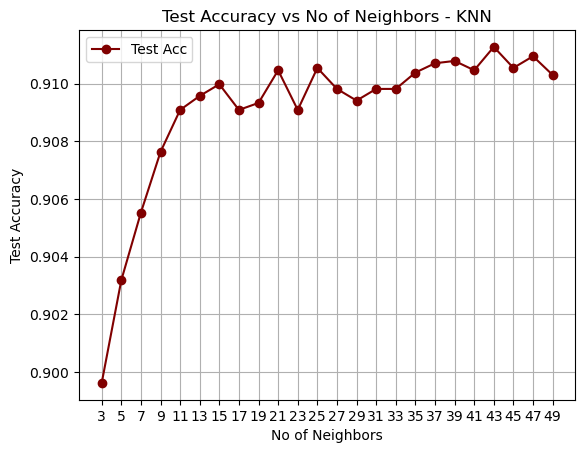

In [107]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


Training Score is: 91.78 %
Testing Score is: 91.05 %

Accuracy_Score is 0.9105
precision Score is: 0.6349
Recall Score is: 0.4954
kappa Score is: 0.5076
F1 Score is: 0.5565

Confusion Matrix is
 [[10553   399]
 [  707   694]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10952
           1       0.63      0.50      0.56      1401

    accuracy                           0.91     12353
   macro avg       0.79      0.73      0.75     12353
weighted avg       0.90      0.91      0.91     12353



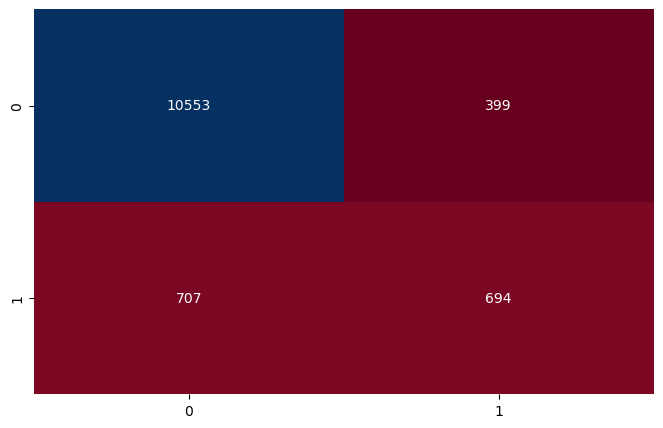

In [108]:
knn2 = KNeighborsClassifier(n_neighbors=21)
eval_model(knn2,x_train,x_test,y_train,y_test)

AUC: 0.9197284666749045


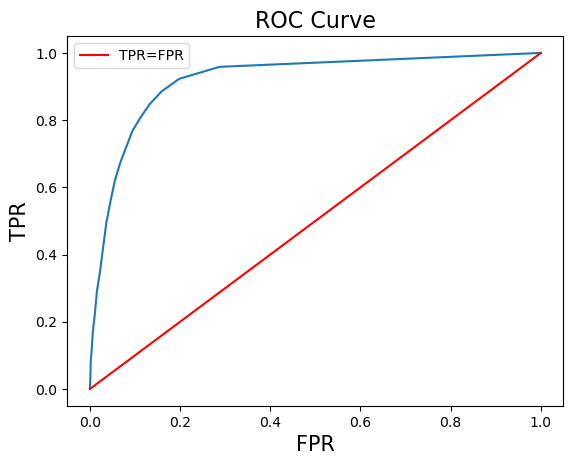

In [109]:
ypred_proba_knn2 = knn2.predict_proba(x_test)

fpr_knn2,tpr_knn2,thresh_knn2 = plot_roc_auc(knn2,y_test,ypred_proba_knn2)

In [110]:
update_score_card(model_name = 'KNN with optimal neighbors')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [111]:
# Support Vector Classifier

In [112]:
# SVM using linear kernel


Training Score is: 90.73 %
Testing Score is: 90.59 %

Accuracy_Score is 0.9059
precision Score is: 0.6705
Recall Score is: 0.334
kappa Score is: 0.4007
F1 Score is: 0.4459

Confusion Matrix is
 [[10722   230]
 [  933   468]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10952
           1       0.67      0.33      0.45      1401

    accuracy                           0.91     12353
   macro avg       0.80      0.66      0.70     12353
weighted avg       0.89      0.91      0.89     12353



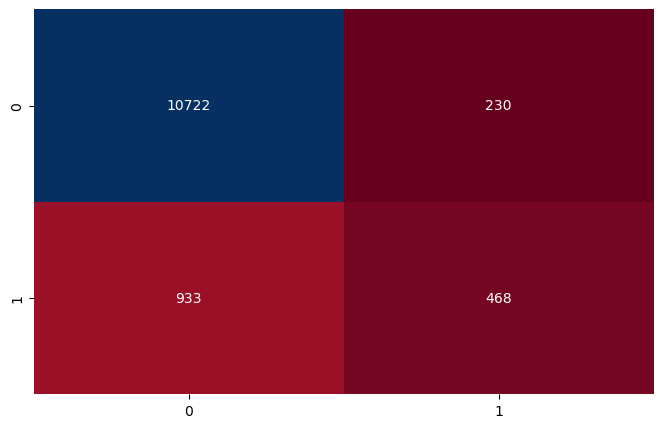

In [113]:
sv1= SVC(kernel='linear')
eval_model(sv1,x_train,x_test,y_train,y_test)

In [114]:
update_score_card(model_name = 'Support Vector using Linear kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [115]:
# SVM using Gaussian kernel


Training Score is: 89.84 %
Testing Score is: 89.55 %

Accuracy_Score is 0.8955
precision Score is: 0.6206
Recall Score is: 0.202
kappa Score is: 0.2638
F1 Score is: 0.3048

Confusion Matrix is
 [[10779   173]
 [ 1118   283]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10952
           1       0.62      0.20      0.30      1401

    accuracy                           0.90     12353
   macro avg       0.76      0.59      0.62     12353
weighted avg       0.87      0.90      0.87     12353



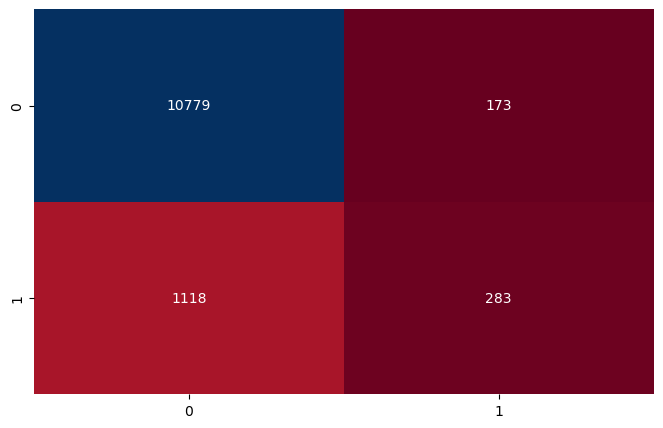

In [116]:
sv_gaussian= SVC(kernel='rbf')
eval_model(sv_gaussian,x_train,x_test,y_train,y_test)

In [117]:
update_score_card(model_name = 'Support Vector using Gaussian kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [118]:
# SVM using Sigmoid kernel


Training Score is: 89.84 %
Testing Score is: 89.55 %

Accuracy_Score is 0.8955
precision Score is: 0.6206
Recall Score is: 0.202
kappa Score is: 0.2638
F1 Score is: 0.3048

Confusion Matrix is
 [[10779   173]
 [ 1118   283]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10952
           1       0.62      0.20      0.30      1401

    accuracy                           0.90     12353
   macro avg       0.76      0.59      0.62     12353
weighted avg       0.87      0.90      0.87     12353



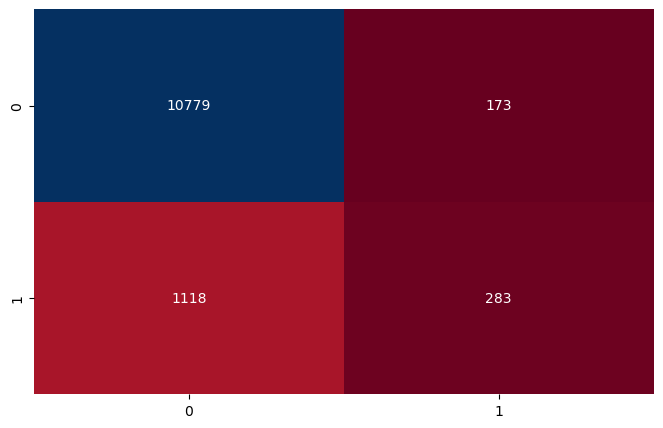

In [119]:
sv_sigmoid= SVC(kernel='sigmoid')
eval_model(sv_sigmoid,x_train,x_test,y_train,y_test)

In [120]:
update_score_card(model_name = 'Support Vector using Sigmoid kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [121]:
# SVM using Polynomial kernel


Training Score is: 89.84 %
Testing Score is: 89.55 %

Accuracy_Score is 0.8955
precision Score is: 0.6206
Recall Score is: 0.202
kappa Score is: 0.2638
F1 Score is: 0.3048

Confusion Matrix is
 [[10779   173]
 [ 1118   283]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10952
           1       0.62      0.20      0.30      1401

    accuracy                           0.90     12353
   macro avg       0.76      0.59      0.62     12353
weighted avg       0.87      0.90      0.87     12353



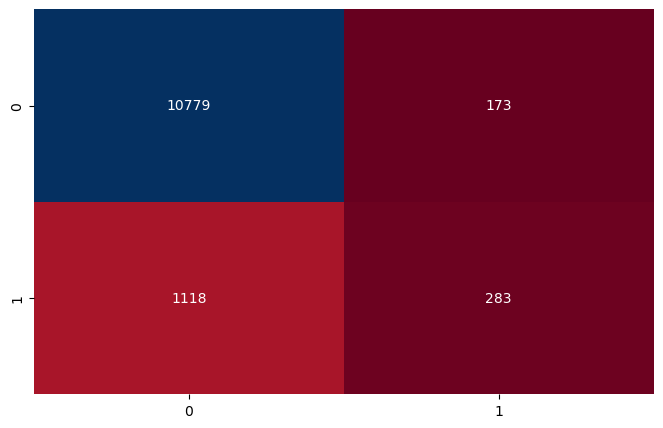

In [122]:
sv_poly= SVC(kernel='poly')
eval_model(sv_poly,x_train,x_test,y_train,y_test)

In [123]:
update_score_card(model_name = 'Support Vector using Polynomial kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.911425,0.909900,0.927494,0.656863,0.430407,0.909900,0.472705,0.520052
1,Logistic Regression using SGD,0.898414,0.891524,0.927494,0.519896,0.568879,0.891524,0.481880,0.543286
2,Decision Tree Classifier,1.000000,0.889662,0.730803,0.513250,0.525339,0.889662,0.456914,0.519224
3,Decision Tree with Pruning,0.927037,0.913139,0.925137,0.646953,0.515346,0.913139,0.526031,0.573699
4,Bagging Ensemble,0.992124,0.906419,0.917260,0.612695,0.475375,0.906419,0.484260,0.535370
5,Adaboost Ensemble,1.000000,0.889581,0.727956,0.513056,0.518915,0.889581,0.453654,0.515969
6,XG Boost Ensemble,0.923707,0.915486,0.939350,0.656442,0.534618,0.915486,0.542745,0.589300
7,Random Forest,0.999965,0.913624,0.940345,0.651268,0.513205,0.913624,0.526742,0.574052
8,Random Forest with Pruning,0.903445,0.900024,0.919733,0.729282,0.188437,0.900024,0.265270,0.299490
9,Naive Bayes Classifier,0.846338,0.846596,0.856078,0.389732,0.623126,0.846596,0.395130,0.479539


In [128]:
# SVM using Polynomial kernel  using GridSearchCV

In [ ]:
tuned_paramaters = [{ 'degree': [2, 4], 'gamma' : ['auto','scale' ], 'C': [0.5, 1] }]

svm_CV= SVC(random_state = 10)

grid = GridSearchCV(estimator=svm_CV , param_grid=tuned_paramaters, scoring='accuracy', cv= 5)

svm_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', svm_grid.best_params_, '\n')

In [ ]:
sv_poly_cv= SVC(kernel='linear', C=, degree=, gamma='scale/auto')
eval_model(sv_poly_cv,x_train,x_test,y_train,y_test)

In [ ]:
update_score_card(model_name = 'Support Vector Polynomial with Grid search CV')

In [ ]:
# Model Comparision

In [ ]:
score_card